<a href="https://colab.research.google.com/github/Ayush-mishra-0-0/dav-project/blob/main/twitter_data_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import seaborn as sns
import re
import string
from collections import Counter, defaultdict

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv('twitter.csv')

In [ ]:
df.head()

,banner_image,fullname,images/0,images/1,images/2,images/3,images/4,images/5,in_reply_to/0,in_reply_to/1,...,tweet_mentions/8,tweet_mentions/9,tweet_mentions/10,tweet_mentions/11,tweet_mentions/12,tweet_mentions/13,tweet_mentions/14,tweet_mentions/15,url,username
0,NaN,ORF Mumbai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://twitter.com/ORFMumbai/status/172232813...,@ORFMumbai
1,NaN,The Hindu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://twitter.com/the_hindu/status/172230925...,@the_hindu
2,NaN,ORF Kolkata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://twitter.com/ORFKolkata/status/17222866...,@ORFKolkata
3,NaN,Itamaraty Brazil 🇧🇷,https://pbs.twimg.com/media/F-bIlACXwAAMiLU.jp...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://twitter.com/Itamaraty_EN/status/172228...,@Itamaraty_EN
4,NaN,The Centre for New Economic Diplomacy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://twitter.com/ORF_CNED/status/1722282839...,@ORF_CNED


In [ ]:
df.columns

Index(['banner_image', 'fullname', 'images/0', 'images/1', 'images/2',
       'images/3', 'images/4', 'images/5', 'in_reply_to/0', 'in_reply_to/1',
       'in_reply_to/2', 'in_reply_to/3', 'in_reply_to/4', 'in_reply_to/5',
       'in_reply_to/6', 'in_reply_to/7', 'in_reply_to/8', 'in_reply_to/9',
       'in_reply_to/10', 'in_reply_to/11', 'in_reply_to/12', 'language',
       'likes', 'num_followers', 'num_following', 'query', 'quotes', 'replies',
       'retweets', 'text', 'timestamp', 'total_likes', 'total_tweets',
       'tweet_avatar', 'tweet_hashtags/0', 'tweet_hashtags/1',
       'tweet_hashtags/2', 'tweet_hashtags/3', 'tweet_hashtags/4',
       'tweet_hashtags/5', 'tweet_hashtags/6', 'tweet_hashtags/7',
       'tweet_hashtags/8', 'tweet_id', 'tweet_links/0', 'tweet_links/1',
       'tweet_mentions/0', 'tweet_mentions/1', 'tweet_mentions/2',
       'tweet_mentions/3', 'tweet_mentions/4', 'tweet_mentions/5',
       'tweet_mentions/6', 'tweet_mentions/7', 'tweet_mentions/8',
       

In [ ]:
df1=df[['fullname','likes','query','replies','retweets','text','timestamp','url','username']]

In [ ]:
df1.head()

,fullname,likes,query,replies,retweets,text,timestamp,url,username
0,ORF Mumbai,1,G-20 lang:en filter:verified -filter:retweets,0,0,The #NewDelhi Declaration’s #policy commitment...,2023-11-08 19:00:00+00:00,https://twitter.com/ORFMumbai/status/172232813...,@ORFMumbai
1,The Hindu,33,G-20 lang:en filter:verified -filter:retweets,3,3,As #India prepares to end its #G20 presidency ...,2023-11-08 17:45:00+00:00,https://twitter.com/the_hindu/status/172230925...,@the_hindu
2,ORF Kolkata,0,G-20 lang:en filter:verified -filter:retweets,0,0,Adding weight to #P20’s representativeness is ...,2023-11-08 16:15:00+00:00,https://twitter.com/ORFKolkata/status/17222866...,@ORFKolkata
3,Itamaraty Brazil 🇧🇷,14,G-20 lang:en filter:verified -filter:retweets,3,2,"The Secretary-General, Ambassador Maria Laura ...",2023-11-08 16:06:00+00:00,https://twitter.com/Itamaraty_EN/status/172228...,@Itamaraty_EN
4,The Centre for New Economic Diplomacy,1,G-20 lang:en filter:verified -filter:retweets,0,1,Under #India’s leadership during the #G20 pres...,2023-11-08 16:00:00+00:00,https://twitter.com/ORF_CNED/status/1722282839...,@ORF_CNED


## As we don't have label of the text that whether it is postive or negative :

In [15]:
!pip install transformers -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.7/311.7 kB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 88.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 82.2 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline
zsc= pipeline(task= "zero-shot-classification")

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


(…)bart-large-mnli/resolve/main/config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

(…)-mnli/resolve/main/tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

(…)/bart-large-mnli/resolve/main/vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

(…)/bart-large-mnli/resolve/main/merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

(…)t-large-mnli/resolve/main/tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
df1['text'][0]

'The #NewDelhi Declaration’s #policy commitments in the #health sector emphasise the role of the #G20 in revising the existing financial and global #health governance discussions, note @SanjayPattansh1, Aniruddha Inamdar, Kiran Bhatt & @helmut_brand or-f.org/130656'

In [ ]:
x=zsc(
    df1['text'][0],
    candidate_labels=['Positive','Negative','Positive criticism','Negative criticism','Neutral']
    )

In [ ]:
x['labels'][0]

'Positive'

In [ ]:
data= pd.DataFrame(columns=['text','label'])

In [ ]:
data['text']=df1['text']

In [ ]:
for i in range(len(df1)):
    text = df1['text'][i]
    ss = zsc(text, candidate_labels=['Positive', 'Negative', 'Positive criticism', 'Negative criticism', 'Neutral'])
    predicted_label=ss['labels'][0]
    data.at[i, 'label'] = predicted_label

data

,text,label
0,The #NewDelhi Declaration’s #policy commitment...,Positive
1,As #India prepares to end its #G20 presidency ...,Negative criticism
2,Adding weight to #P20’s representativeness is ...,Positive
3,"The Secretary-General, Ambassador Maria Laura ...",Positive
4,Under #India’s leadership during the #G20 pres...,Positive
...,...,...
519,"With commitment, collaboration, and a comprehe...",Positive
520,This Policy Brief recommends the creation of a...,Positive
521,"Big news! The African Union, representing all ...",Negative criticism
522,"From trust deficit to trust management, #G20 N...",Positive


In [ ]:
data.to_csv('Twitter-label.csv')

In [2]:
data=pd.read_csv('Twitter-label.csv')

In [3]:
data['label'].value_counts()

Positive              298
Negative criticism    165
Negative               56
Positive criticism      5
Name: label, dtype: int64

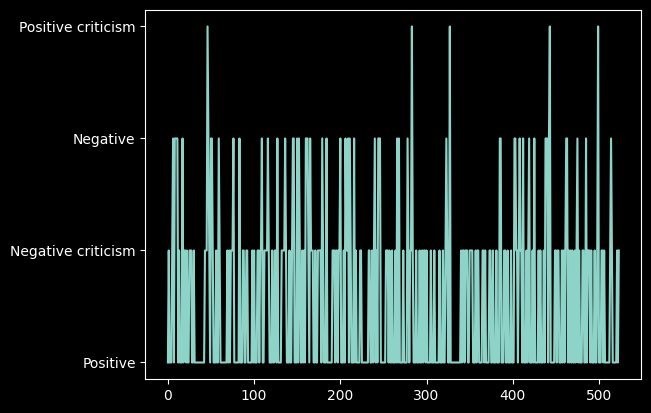

In [4]:
plt.style.use('dark_background')
plt.plot(data['label'])

In [5]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        max_words=200,
        max_font_size=40,
        scale=1,
        random_state=1
    ).generate(" ".join(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

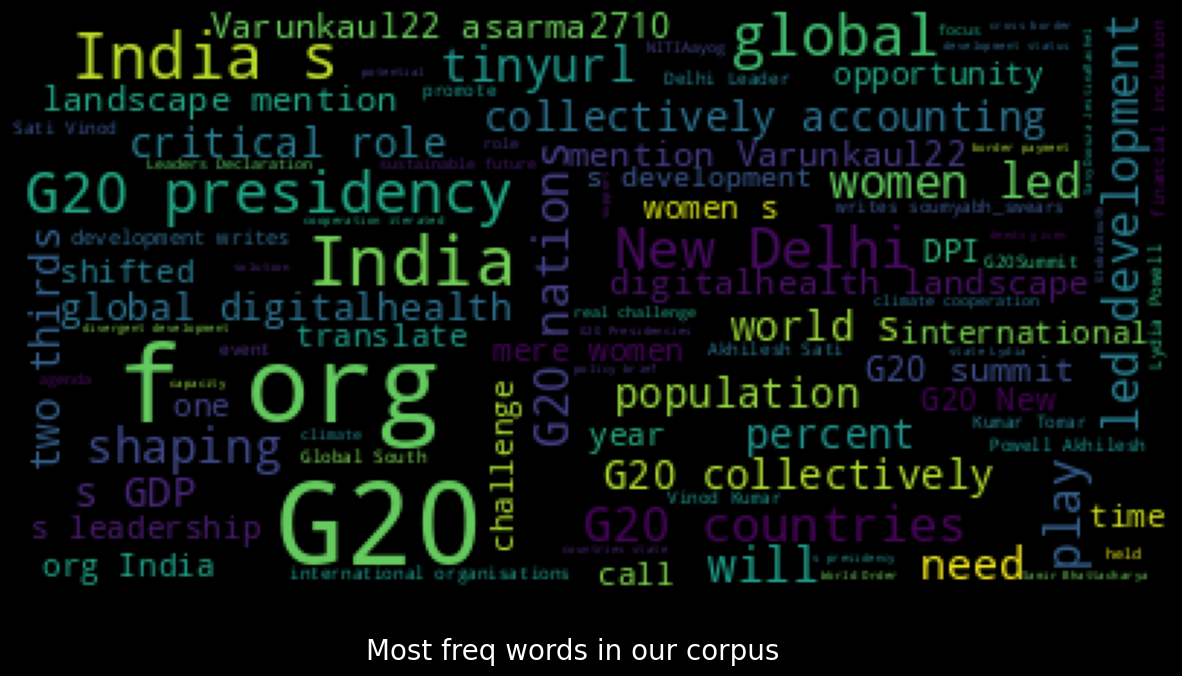

In [6]:
show_wordcloud(data['text'].values,title="Most freq words in our corpus")

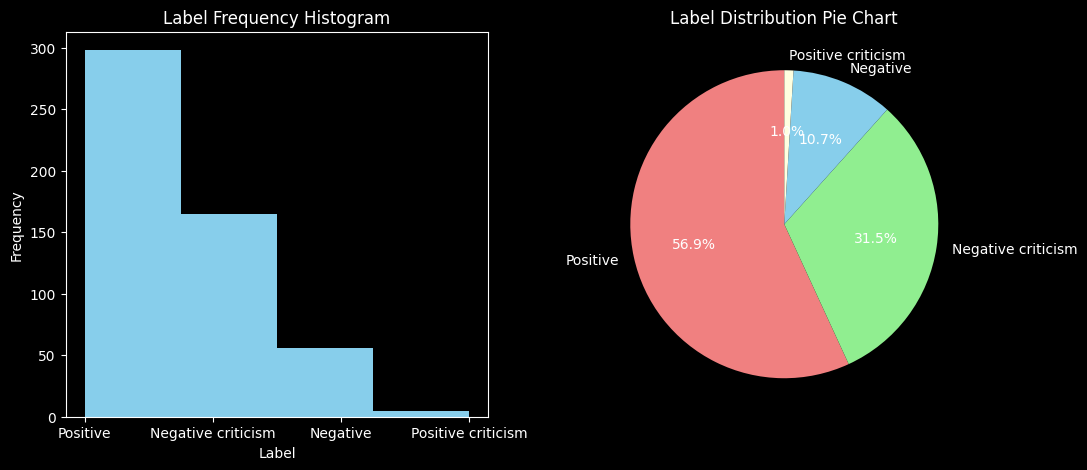

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plt.style.use('dark_background')
axes[0].hist(data['label'].values, bins=len(data['label'].unique()), color='skyblue')
axes[0].set_title('Label Frequency Histogram')
axes[0].set_xlabel('Label')
axes[0].set_ylabel('Frequency')

label_counts = data['label'].value_counts()
axes[1].pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen', 'skyblue', 'lightyellow', 'lightgrey'])
axes[1].set_title('Label Distribution Pie Chart')

plt.show()


#### Counting taken using custom tokenizer

In [8]:
def tokenize(text):
    """ basic tokenize method with word character, non word character and digits """
    text = re.sub(r" +", " ", str(text))
    text = re.split(r"(\d+|[a-zA-ZğüşıöçĞÜŞİÖÇ]+|\W)", text)
    text = list(filter(lambda x: x != '' and x != ' ', text))
    sent_tokenized = ' '.join(text)
    return sent_tokenized

In [9]:
# tokenize data
data["tokenized_review"] = data.text.apply(lambda x: tokenize(x))
# calculate token count for any sent
data["sent_token_length"] = data["tokenized_review"].apply(lambda x: len(x.split()))

In [10]:
data

,Unnamed: 0,text,label,tokenized_review,sent_token_length
0,0,The #NewDelhi Declaration’s #policy commitment...,Positive,The # NewDelhi Declaration ’ s # policy commit...,56
1,1,As #India prepares to end its #G20 presidency ...,Negative criticism,As # India prepares to end its # G 20 presiden...,59
2,2,Adding weight to #P20’s representativeness is ...,Positive,Adding weight to # P 20 ’ s representativeness...,48
3,3,"The Secretary-General, Ambassador Maria Laura ...",Positive,"The Secretary - General , Ambassador Maria Lau...",58
4,4,Under #India’s leadership during the #G20 pres...,Positive,Under # India ’ s leadership during the # G 20...,43
...,...,...,...,...,...
519,519,"With commitment, collaboration, and a comprehe...",Positive,"With commitment , collaboration , and a compre...",54
520,520,This Policy Brief recommends the creation of a...,Positive,This Policy Brief recommends the creation of a...,37
521,521,"Big news! The African Union, representing all ...",Negative criticism,"Big news ! The African Union , representing al...",68
522,522,"From trust deficit to trust management, #G20 N...",Positive,"From trust deficit to trust management , # G 2...",53


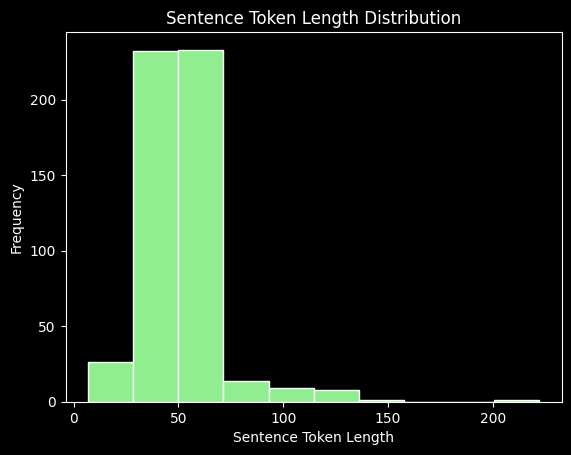

In [11]:
plt.hist(data['sent_token_length'], histtype='bar', color='lightgreen', edgecolor='white')

plt.title('Sentence Token Length Distribution')
plt.xlabel('Sentence Token Length')
plt.ylabel('Frequency')

plt.show()

In [12]:
(data.sent_token_length < 200).mean()

0.9980916030534351

In [13]:
data.sent_token_length.max()

222

#### Using dl approach(bert tokenizer)

In [16]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
                                          do_lower_case=True)

(…)cased/resolve/main/tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

(…)bert-base-uncased/resolve/main/vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

(…)base-uncased/resolve/main/tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

(…)rt-base-uncased/resolve/main/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [17]:
data["sent_bert_token_length"] = data["text"].apply(lambda x: len(tokenizer(x, add_special_tokens=False)["input_ids"]))

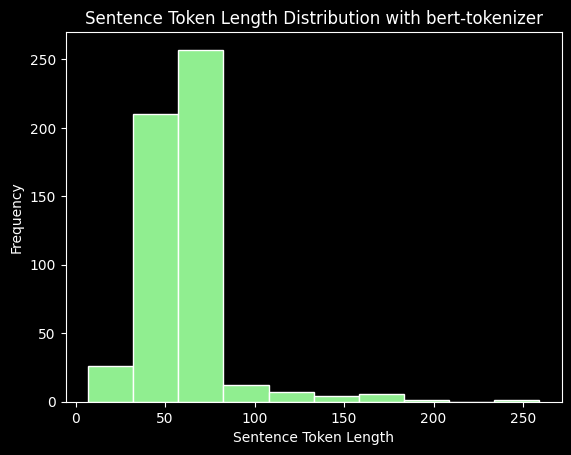

In [18]:
plt.hist(data['sent_bert_token_length'], histtype='bar', color='lightgreen', edgecolor='white')

plt.title('Sentence Token Length Distribution with bert-tokenizer')
plt.xlabel('Sentence Token Length')
plt.ylabel('Frequency')

plt.show()

In [19]:
print(data.sent_bert_token_length.max())
(data.sent_bert_token_length < 200).mean()

259


0.9980916030534351

#### Character-count

In [76]:
import warnings
warnings.simplefilter('ignore', category=UserWarning)

# valvulate char count for each review
data['char_count'] = data['text'].apply(lambda x: len(str(x)))
def plot_graph(df,feat,title):
        fig = plt.figure(constrained_layout=True, figsize=(18, 8))
        grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
        ax1 = fig.add_subplot(grid[0, :2])
        ax1.set_title('Histogram')
        sns.distplot(df.loc[:, feat],
                      hist=True,
                      kde=True,
                      ax=ax1,
                      )
        ax1.set(ylabel='Frequency')
        ax1.xaxis.set_major_locator(MaxNLocator(nbins=20))

        plt.suptitle(f'{title}', fontsize=15)

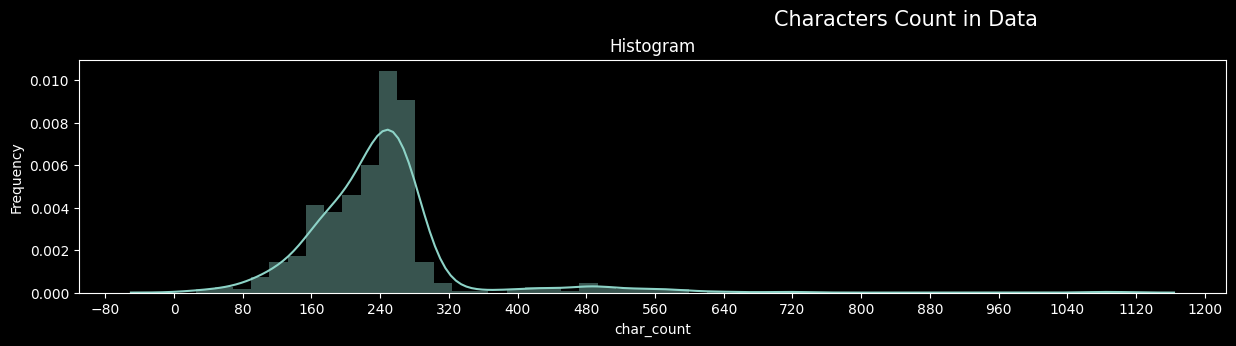

In [77]:
plot_graph(data,"char_count",title='Characters Count in Data')

In [78]:
data.sample(5)

,Unnamed: 0,text,label,tokenized_review,sent_token_length,sent_bert_token_length,char_count,Character Count,Count
182,182,As a part of its G20 Think Tank Workshop Serie...,Positive,As a part of its G 20 Think Tank Workshop Seri...,43,51,213,213,213
403,403,Don't miss UNA-UK CEO Marissa Conway + @GAPS_N...,Negative,Don t miss UNA UK CEO Marissa Conway G...,64,71,249,249,249
140,140,Saudi Arabia Achieves a Leading Position in th...,Positive,Saudi Arabia Achieves a Leading Position in th...,31,37,142,142,142
431,431,#G20 should promote Liquefied Petroleum Gas (#...,Positive,G 20 should promote Liquefied Petroleum Gas ...,34,45,143,143,143
397,397,"With commitment, collaboration, and a comprehe...",Positive,With commitment collaboration and a compre...,54,72,257,257,257


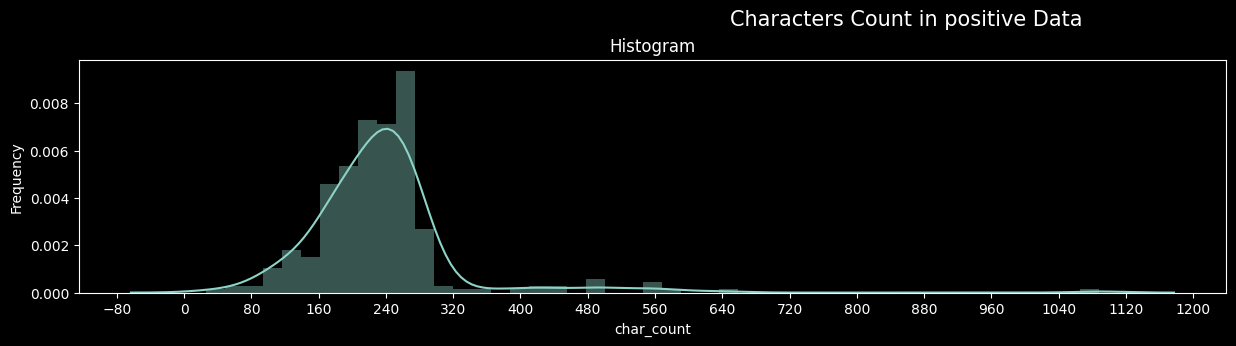

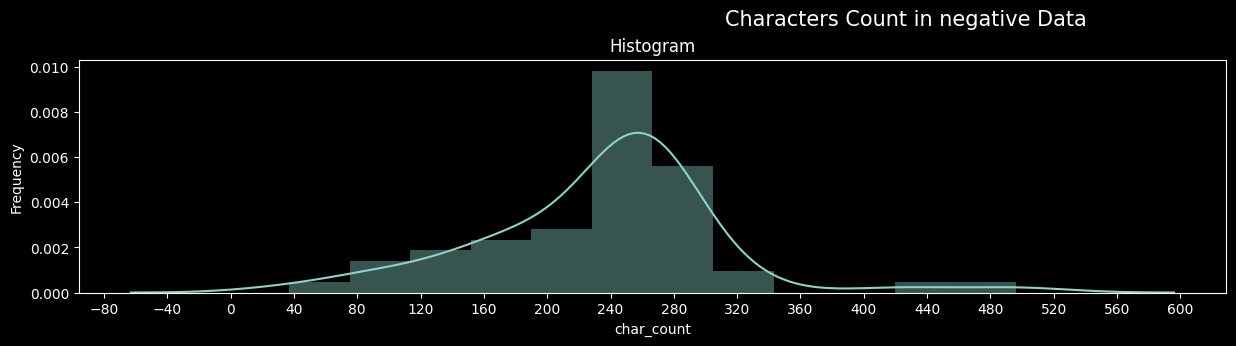

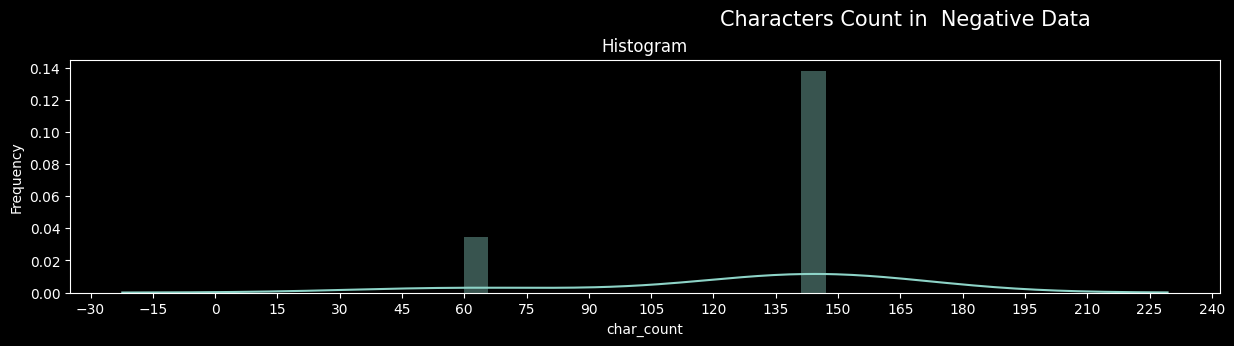

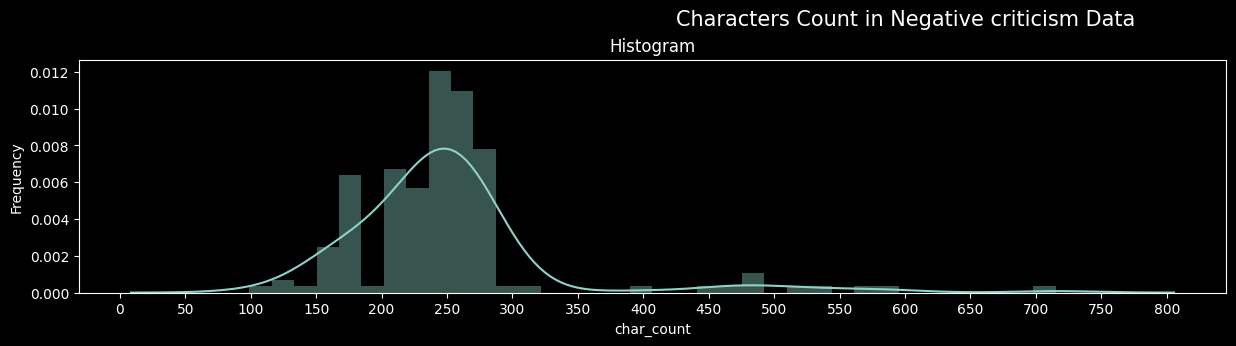

In [80]:
plot_graph(data[data['label']=='Positive'],"char_count",title='Characters Count in positive Data')
plot_graph(data[data['label']=='Negative'],"char_count",title='Characters Count in negative Data')
plot_graph(data[data['label']=='Positive criticism'],"char_count",title='Characters Count in  Negative Data')
plot_graph(data[data['label']=='Negative criticism'],"char_count",title='Characters Count in Negative criticism Data')

#### Counting the length of review

In [55]:
data['Count'] = data['text'].apply(lambda x: len(str(x)))

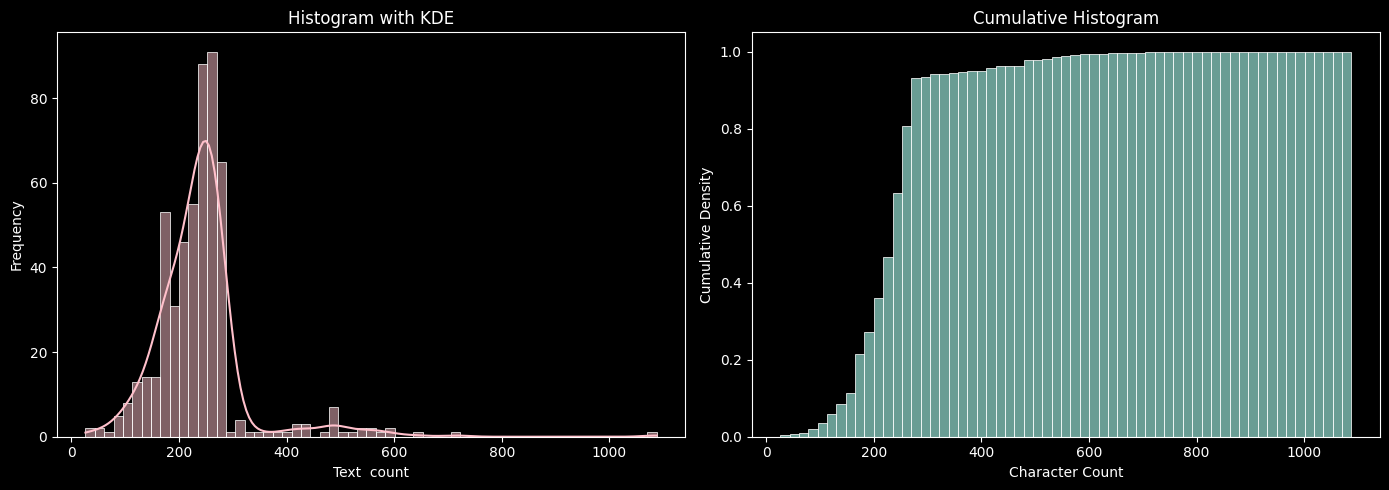

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(data['Count'], kde=True,color='pink', ax=axes[0])
axes[0].set_title('Histogram with KDE')
axes[0].set_xlabel('Text  count')
axes[0].set_ylabel('Frequency')

sns.histplot(data['Character Count'], cumulative=True, stat='density', kde_kws={'cumulative': True}, ax=axes[1])
axes[1].set_title('Cumulative Histogram')
axes[1].set_xlabel('Character Count')
axes[1].set_ylabel('Cumulative Density')

plt.tight_layout()

plt.show()



#### Most common words

In [106]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords_nltk = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [107]:
# first we have to remove punctation as they might be most common token in our corpus
# but does not have semantic value so it makes sense to remove them

regex = re.compile('[%s]' % re.escape(string.punctuation))

def remove_punct(text):
    text = regex.sub(" ", text)
    return text

data['tokenized_review'] = data['tokenized_review'].apply(lambda x: remove_punct(x))

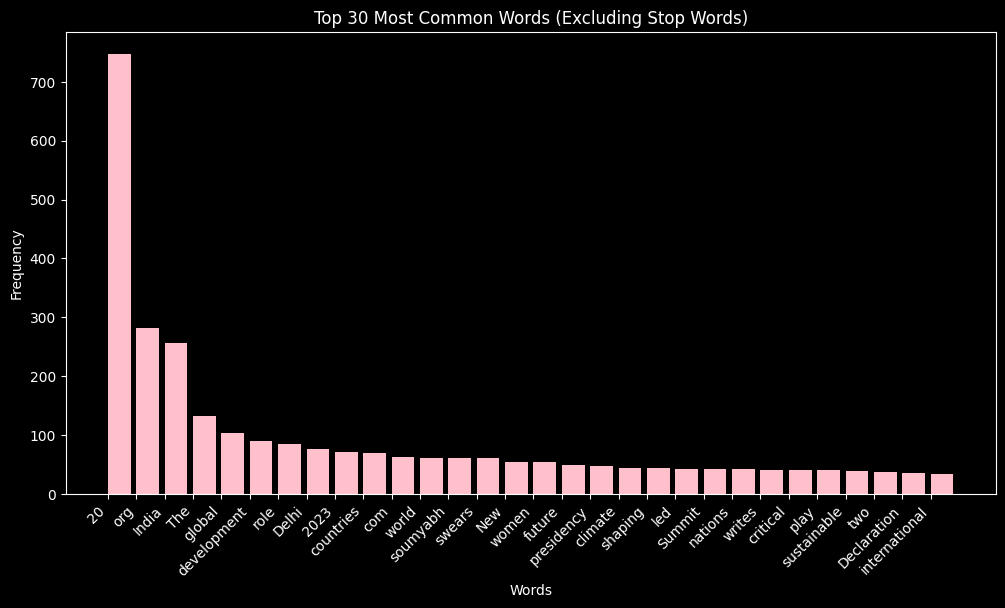

In [108]:
texts = data['tokenized_review']
new = texts.str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]
counter = Counter(corpus)

filtered_counter = {word: count for word, count in counter.items() if word not in stopWords_nltk and len(word) != 1}

most_common = dict(sorted(filtered_counter.items(), key=lambda x: x[1], reverse=True)[:30])

# plot
plt.figure(figsize=(12, 6))
plt.bar(most_common.keys(), most_common.values(), color='pink',align='edge')
plt.title('Top 30 Most Common Words (Excluding Stop Words)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Most n-grams

In [134]:
fig = make_subplots(rows=2, cols=2, subplot_titles=["Positive", "Negative criticism", "Negative", "Positive criticism"])

colors = ['gold', 'mediumturquoise', 'lightcoral', 'lightgreen']
title_ = ["Positive", "Negative criticism", "Negative", "Positive criticism"]

for i in range(4):
    texts = data[data["label"] == title_[i]]['tokenized_review']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []

    for word, count in most[:100]:
        if word not in stopWords_nltk and len(word) != 1:
            x.append(word)
            y.append(count)

    fig.add_trace(go.Bar(
        x=y,
        y=x,
        orientation='h',
        type="bar",
        name=title_[i],
        marker=dict(color=colors[i])
    ), row=(i // 2) + 1, col=(i % 2) + 1)

fig.update_layout(
    autosize=False,
    width=1000,
    height=800,
    title=dict(
        text='<b>Most Common ngrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
            family="Courier New, monospace",
            size=24,
            color="RebeccaPurple"
        )
    ),
)

fig.show()


In [131]:
def _get_top_ngram(corpus, n=None):
    #getting top ngrams
    vec = CountVectorizer(ngram_range=(n, n),
                          max_df=0.9,
                          ).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:15]

In [140]:
data.sample(5)

,Unnamed: 0,text,label,tokenized_review,sent_token_length,sent_bert_token_length,char_count,Character Count,Count
407,407,"#Godse at home, #Gandhi abroad—the duplicitous...",Negative criticism,Godse at home Gandhi abroad — the duplic...,62,70,285,285,285
344,344,Through a combination of #digital transformati...,Positive,Through a combination of digital transformat...,45,51,241,241,241
224,224,The #G20 needs to push further for developed c...,Negative criticism,The G 20 needs to push further for developed...,51,59,229,229,229
466,466,The #NewDelhi Declaration’s #policy commitment...,Positive,The NewDelhi Declaration ’ s policy commit...,56,73,264,264,264
114,114,"#Throwback B20 Summit India, when the world le...",Negative criticism,Throwback B 20 Summit India when the world...,110,158,467,467,467


In [136]:
_get_top_ngram(data['tokenized_review'],2)

[('the 20', 317),
 ('or org', 247),
 ('of the', 148),
 ('20 india', 80),
 ('in the', 70),
 ('soumyabh swears', 61),
 ('swears or', 61),
 ('at the', 59),
 ('india 20', 58),
 ('20 presidency', 56),
 ('the global', 52),
 ('new delhi', 51),
 ('the world', 48),
 ('role in', 45),
 ('20 summit', 43)]

In [144]:
fig = make_subplots(rows=2, cols=2, subplot_titles=["Positive", "Negative criticism", "Negative", "Positive criticism"])

colors = ['gold', 'mediumturquoise', 'lightcoral', 'lightgreen']
title_ = ["Positive", "Negative criticism", "Negative", "Positive criticism"]

for i in range(4):
    texts = data[data["label"] == title_[i]]['tokenized_review']
    top_n_bigrams = _get_top_ngram(texts, 2)[:15]
    x, y = map(list, zip(*top_n_bigrams))

    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), row=(i // 2) + 1, col=(i % 2) + 1),

fig.update_layout(
    autosize=False,
    width=1000,
    height=600,title=dict(
        text='<b>Most Common bigrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ))

fig.show()

In [147]:
fig = make_subplots(rows=2, cols=2, subplot_titles=["Positive", "Negative criticism", "Negative", "Positive criticism"])
colors = ['gold', 'mediumturquoise', 'lightcoral', 'lightgreen']
title_ = ["Positive", "Negative criticism", "Negative", "Positive criticism"]

for i in range(4):
    texts = data[data["label"] == title_[i]]['tokenized_review']
    top_n_bigrams = _get_top_ngram(texts, 3)[:15]
    x, y = map(list, zip(*top_n_bigrams))
    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), row=(i // 2) + 1, col=(i % 2) + 1),

fig.update_layout(
    autosize=False,
    width=1500,
    height=600,title=dict(
        text='<b>Most Common bigrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ))
fig.show()